# Aprendizado de máquina - II

## Resumo

- Na aula anterior... problema de classificação (aprendizado de máquina supervisionado)
- Nesta aula, resolveremos um problema de _clusterização_ (**aprendizado de máquina não supervisionado**) 
- Aprendizado supervisionado: possível medir erros entre os valores esperados e os previstos
- Aprendizado não supervisionado: algoritmos categorizam _features_ através de critérios de similaridade, estatísticos ou geométricos.

## Breves comentários sobre aprendizagem

- _Aprendizagem_: conceito quantificável por meio de erros. 
- Durante treinamento do algoritmo, dois erros são estimados. 

### Erro de treinamento

- Mede a discrepância entre as amostras observadas e as amostras apenas do conjunto de treinamento.
- Erro por amostras (ex. classificação):
$$e_i = e(x_i,y_i) =
\begin{cases}
1, \ \ \text{se} \ \ h(x_i) = y_i \\
0, \ \ \text{caso contrário}
\end{cases}$$

- Define-se o erro de treinamento por:
$$E_{tr} = \frac{ \sum_{i=1}^n e_i }{n},$$

### Erro de generalização 

- Erro médio calculado sobre os dados não vistos ($E_gen$)
- Em geral, $E_{gen} \geq E_{tr}$ e a _aprendizagem_ é atingida quando $E_{gen}$ é o menor possível. 
- Assim, **a aprendizagem é o resultado de $E_{tr} \to 0$, ou $E_{gen} \approx E_{tr}$**. 
- Um excelente treinamento deve conduzir a um modelo de aprendizagem robusto.

### Curvas de aprendizagem, _overfitting_ e _underfitting_

- A aprendizagem é medida por meio de _curvas de aprendizagem_, que possuem aparência assintótica. 
- Modelos com alto desempenho durante a etapa de treinamento que generalizam mal tendem a sofrer um _superajustamento_ (_overfitting_). 
- Modelos com baixo desempenho já durante a etapa de treinamento tendem a sofrer um _subajustamento_ (_underfitting_). 
- Ambos os comportamentos são percebidos nas curvas de aprendizagem. 
- A correção de _overfitting_ ou _underfitting_ pode ser feita com várias técnicas, tais como _regularização_.

## Treinamento, validação e generalização

- _treinamento_: etapa em que se verifica o desempenho de um modelo a partir de uma classe de modelos.
- _validação_: etapa em que se selecionam os melhores hiperparâmetros do modelo tendo por base estimativas do erro de generalização. 
- _generalização (ou teste)_: etapa exclusiva em que se avalia o desempenho final do modelo sobre um conjunto de dados que nunca deve ser usado nas etapas de treinamento ou validação. 

## Estudo de caso: clusterização de dados aleatórios

### O que é clusterização? 

Particionamento de dados em subconjuntos disjuntos chamados _clusters_, de forma que os elementos de um cluster sejam altamente similares (alta _similaridade intra-classe_) e os elementos de clusters distintos possuam baixa similaridade com os os demais clusters (baixa _similaridade inter-classe_ ).

### Similaridade e distância

- Estabelecer "similaridade" entre instâncias pode ser um pouco difícil. 
- Em problemas de clusterização, usam-se distâncias. 

### Distância de Minkowski

$$d({\bf x},{\bf y}) = \left( \sum_{i=1}^d | x_i - y_i |^p \right)^{1/p},$$

com ${\bf x}$ e ${\bf y}$ vetores do espaço $\mathbb{R}^n$ e $p \in \mathbb{R}$ é um parâmetro. Dependendo do valor de $p$, a fórmula se reduz a outras distâncias conhecidas:

- Se $p = 2$, temos a _distância Euclidiana_;
- Se $p = 1$, temos a _distância de Manhattan_ (ou _distância do taxista_);
- Se $p = \infty$, temos a _distância de Chebyshev_ (ou _distância do máximo_), definida por $\max \{ | x_i - y_i | \}$, isto é, a componente com o maior módulo.

### O algoritmo _k-means_

_k-means_ é um algoritmo classificado como de _partição rígida_ que atribui cada elemento no espaço de _features_ a um único cluster. Os passos do algoritmo são: 

1. Inicialize o valor _k_ de clusters desejados;
2. Inicialize os centroides dos _k clusters_;
3. Atribua cada uma das _n_ amostras de dados ao cluster cujo centroide está mais próximo da amostra;
4. Redefina os _k_ centroides iterativamente assumindo que estejam corretos;
5. Se nenhuma amostra migrar de um cluster para outro na última iteração, pare. Caso contrário, retorne ao passo 3.

In [24]:
import numpy as np
import matplotlib.pylab as plt

In [26]:
# cria dados aleatórios
N = 40

X1 = 1.25*np.random.randn(N,2)
X2 = 5 + 1.5*np.random.randn(N,2)
X3 = [8,3] + 1.2*np.random.randn(N,2)

X = np.concatenate([X1,X2,X3])

X.shape

(120, 2)

Vamos criar rótulos para os 3 grupos e mostrar a clusterização segundo o que nós pré-determinamos e o que, de fato, é passado como entrada para o algoritmo.

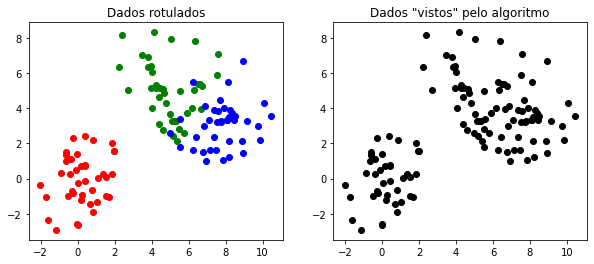

In [28]:
# cria labels
c = np.concatenate([np.full(N,1), np.full(N,2), np.full(N,3)])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X1[:,0],X1[:,1],color='r')
plt.scatter(X2[:,0],X2[:,1],color='g')
plt.scatter(X3[:,0],X3[:,1],color='b')
plt.title('Dados rotulados')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],color='k')
plt.title('Dados "vistos" pelo algoritmo');

Usa _k-means_ com inicialização de 3 clusters.

In [30]:
from sklearn import cluster

# no. de clusters
k = 3

# ajusta parâmetros de aprendizagem
cfit = cluster.KMeans(init='random',n_clusters=k)
cfit.fit(X)

KMeans(init='random', n_clusters=3)

In [32]:
# labels do ajuste
print(cfit.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


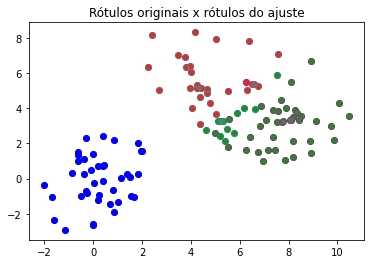

In [35]:
# plota comparativo de labels (original x ajuste)
cl = cfit.labels_ + 1

plt.scatter(X[cl==1,0], X[cl==1,1],color='r')
plt.scatter(X1[:,0],X1[:,1],color='gray',edgecolor='k',alpha=0.4)

plt.scatter(X[cl==2,0], X[cl==2,1],color='g')
plt.scatter(X2[:,0],X2[:,1],color='gray',edgecolor='c',alpha=0.4)

plt.scatter(X[cl==3,0], X[cl==3,1],color='b')
plt.scatter(X3[:,0],X3[:,1],color='gray',edgecolor='m',alpha=0.4);

plt.title('Rótulos originais x rótulos do ajuste');

Criando pontos novos no espaço que cobre os dados originais. 

In [53]:
# gera "grade" 2D de pontos 
# em [-5,15] x [-5,15]
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz = XX.shape

# concatena
data = np.c_[XX.flatten(), YY.flatten()]

# predição
Z = cfit.predict(data)

Verificando partição do espaço determinado pelo algoritmo x dados originais.

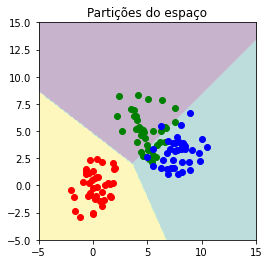

In [56]:
# partições do espaço
plt.imshow(Z.reshape(sz), interpolation='bilinear', 
           origin='lower', extent=(-5,15,-5,15), 
           alpha=0.3,vmin=0,vmax=k-1)
plt.scatter(X[c==1,0], X[c==1,1],color='r')
plt.scatter(X[c==2,0], X[c==2,1],color='g')
plt.scatter(X[c==3,0], X[c==3,1],color='b')
plt.title('Partições do espaço');

Então, comparamos o resultado da clusterização em comparação com os dados originais.

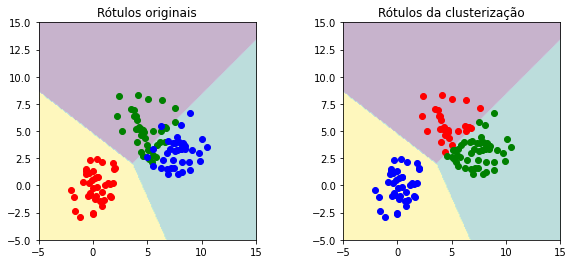

In [62]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
# overlay
plt.imshow(Z.reshape(sz), interpolation='bilinear', 
           origin='lower', extent=(-5,15,-5,15), 
           alpha=0.3,vmin=0,vmax=k-1)
# original
plt.title('Rótulos originais')
plt.scatter(X[c==1,0], X[c==1,1],color='r')
plt.scatter(X[c==2,0], X[c==2,1],color='g')
plt.scatter(X[c==3,0], X[c==3,1],color='b')
plt.subplot(1,2,2)
# overlay
plt.imshow(Z.reshape(sz), interpolation='bilinear', 
           origin='lower', extent=(-5,15,-5,15), 
           alpha=0.3,vmin=0,vmax=k-1)
# clusterização
plt.title('Rótulos da clusterização')
plt.scatter(X[cl==1,0], X[cl==1,1],color='r')
plt.scatter(X[cl==2,0], X[cl==2,1],color='g')
plt.scatter(X[cl==3,0], X[cl==3,1],color='b');

## Métricas de qualidade para clusterização

### Coeficiente de Silhueta

- Valor atribuído a cada ponto de um cluster para medir a "silhueta" de seu cluster

$$s(i) = \frac{b(i) - a(i)}{\max \{a(i),b(i)\}},$$

- $a(i)$ é a distância média intra-cluster da amostra $i$, isto é, a distância média da amostra $i$ a todos as suas "irmãs", percententes ao seu mesmo _cluster_. Este valor mede a dissimilaridade de $i$ em relação às suas amostras "irmãs".

- $b(i)$ é a distância média inter-cluster da amostra $i$, considerando o cluster _A_ ao qual ela pertence e o _cluster_ _B_ mais próximo de _A_. Este valor mede a dissimilaridade de $i$ em relação a todas as amostras em _B_.

### Interpretação

O valor de $s$ varia no intervalo [-1,1]

- Quando $s=-1$, a clusterização é considerada incorreta
- Quando $s=1$, a clusterização está muito densa. 
- Quando $s \approx 0$, há _clusters_ que sobrepõem.

Vamos calcular $s$ para o nosso exemplo.

In [66]:
from sklearn import metrics
ss = metrics.silhouette_samples(X,cl,metric='euclidean')
ssm = metrics.silhouette_score(X,cl,metric='euclidean')

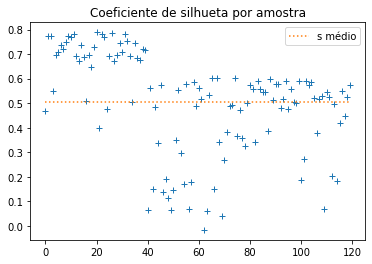

In [69]:
plt.title('Coeficiente de silhueta por amostra')
plt.plot(ss,'+');
plt.plot(np.arange(len(ss)),np.full(np.shape(ss),ssm),':',label='s médio');
plt.legend();

### Análise de silhueta

Usada para escolher um valor ótimo para o número de clusters a serem determinados.

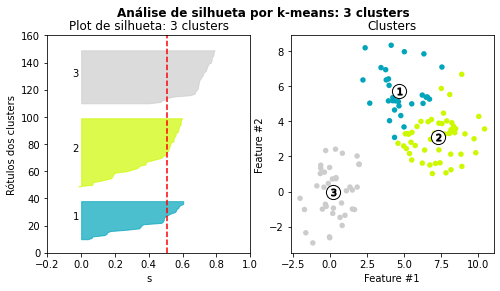

In [71]:
import matplotlib.cm as cm

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8, 4)

ax1.set_xlim([-0.2,1])
ax1.set_ylim([0, len(X) + (k + 1) * 10])


y_lower = 10
for i in range(1,k+1):
    ssi = ss[cl == i] # i-th cluster s
    ssi.sort()
    sizei = ssi.shape[0]
    y_upper = y_lower + sizei
    
    color = cm.nipy_spectral(float(i) / k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0,
                      ssi,facecolor=color, edgecolor=color,
                      alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * sizei, str(i))
    y_lower = y_upper + 10
    
ax1.set_title(f'Plot de silhueta: {k} clusters')
ax1.set_xlabel("s")
ax1.set_ylabel("Rótulos dos clusters")    
    
ax1.axvline(x=ssm, color="red", linestyle="--")
    
colors = cm.nipy_spectral(cl.astype(float)/k)
ax2.scatter(X[:, 0],X[:, 1],marker='o', s=30, lw=0, alpha=1.0,
            c=colors, edgecolor='k')    
centroides = cfit.cluster_centers_
ax2.scatter(centroides[:, 0], centroides[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centroides):
    
    ax2.scatter(c[0], c[1], marker=f'$%d$' % (i+1), alpha=1,
                s=50, edgecolor='k')
    
ax2.set_title("Clusters") 
ax2.set_xlabel("Feature #1")
ax2.set_ylabel("Feature #2")
plt.suptitle(("Análise de silhueta por k-means: %d clusters" % k),
                 fontsize=12, fontweight='bold');

## Conclusão

A análise de silhueta mostra que 3 clusters é um número adequado porque em todos eles há amostras com valor de $s$ acima da média. A espessura das silhuetas também ajuda a ter uma ideia do "tamanho" dos _clusters_.